In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("forestfires.csv")

In [3]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

array([[<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'dayfri'}>],
       [<Axes: title={'center': 'daymon'}>,
        <Axes: title={'center': 'daysat'}>,
        <Axes: title={'center': 'daysun'}>,
        <Axes: title={'center': 'daythu'}>,
        <Axes: title={'center': 'daytue'}>],
       [<Axes: title={'center': 'daywed'}>,
        <Axes: title={'center': 'monthapr'}>,
        <Axes: title={'center': 'monthaug'}>,
        <Axes: title={'center': 'monthdec'}>,
        <Axes: title={'center': 'monthfeb'}>],
       [<Axes: title={'center': 'monthjan'}>,
        <Axes: title={'center': 'monthjul'}>,
        <Axes: title={'center': 'monthjun'}>,
        <A

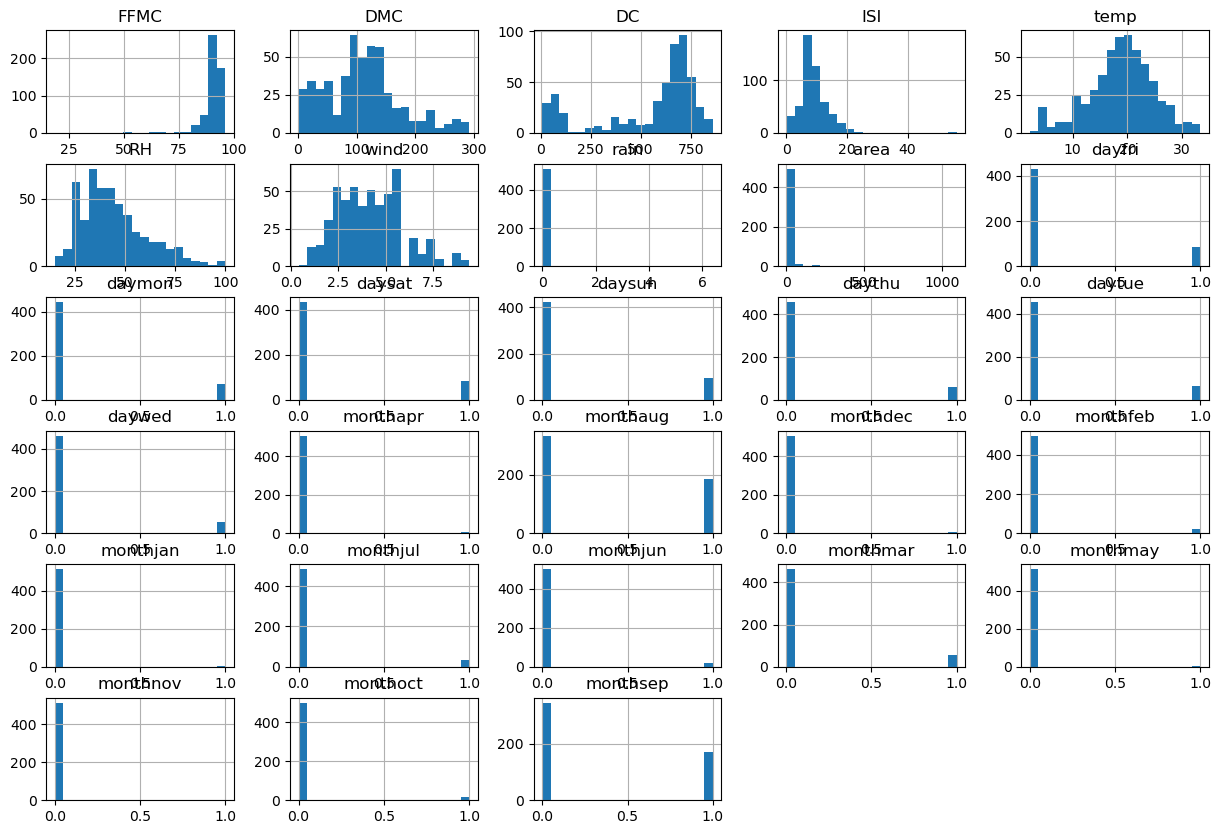

In [6]:
data.hist(figsize=(15,10), bins=20)

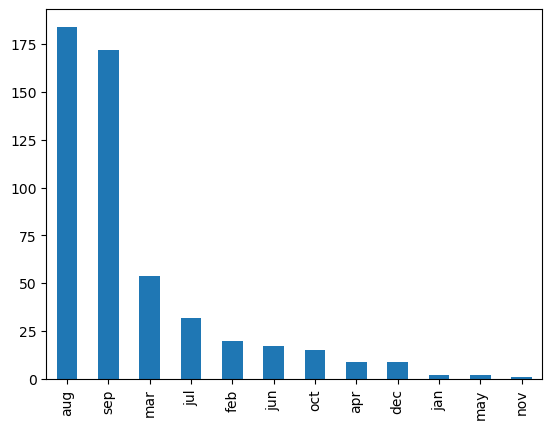

In [7]:
data['month'].value_counts().plot.bar()
plt.show()

In [8]:
print(data['month'].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


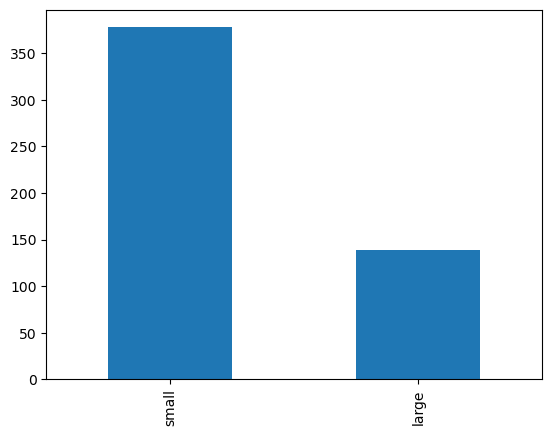

In [9]:
data['size_category'].value_counts().plot.bar()
plt.show()

In [10]:
print(data['size_category'].value_counts())

small    378
large    139
Name: size_category, dtype: int64


In [11]:
x = data.drop(columns=['month','day','size_category'])
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y = data.iloc[:,-1]
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

## Train / Test Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((413, 28), (413,), (104, 28), (104,))

## Linear

In [15]:
model_linear1 = SVC(kernel = "linear")
model_linear1.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
pred_test_linear1 = model_linear1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear1)*100)

Accuracy: 100.0


In [17]:
#SVC classifier
clf=SVC()
param_grid=[{'kernel':['linear'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2],
                          'kernel': ['linear']}])

In [18]:
gsv.best_params_,gsv.best_score_

({'C': 0.01, 'gamma': 50, 'kernel': 'linear'}, 0.9927409988385598)

In [19]:
clf = SVC(C= 0.01,kernel="linear", gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 98.07692307692307


In [20]:
confusion_matrix(y_test, y_pred)

array([[27,  1],
       [ 1, 75]], dtype=int64)

## RBF

In [21]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [22]:
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf)*100)

Accuracy: 75.0


In [23]:
#SVC classifier
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['rbf']}])

In [24]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'rbf'}, 0.7361207897793263)

In [25]:
clf = SVC(C= 1000,kernel="rbf", gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 73.07692307692307


In [26]:
confusion_matrix(y_test, y_pred)

array([[ 0, 28],
       [ 0, 76]], dtype=int64)

## Poly

In [27]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [28]:
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly)*100)

Accuracy: 78.84615384615384


In [29]:
#SVC classifier
clf=SVC()
param_grid=[{'kernel':['poly'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2], 'kernel': ['poly']}])

In [30]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'poly'}, 0.9757839721254357)

In [31]:
clf = SVC(C= 1000,kernel="poly", gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 96.15384615384616


In [32]:
confusion_matrix(y_test, y_pred)

array([[25,  3],
       [ 1, 75]], dtype=int64)

## Sigmoid

In [33]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid)*100)

Accuracy: 74.03846153846155


In [34]:
#SVC classifier
clf=SVC()
param_grid=[{'kernel':['sigmoid'],'gamma':[50,5,10,.5,.2],"C":[1000,500,50,15,14,13,12,11,0.1,0.01,0.001]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1000, 500, 50, 15, 14, 13, 12, 11, 0.1, 0.01,
                                0.001],
                          'gamma': [50, 5, 10, 0.5, 0.2],
                          'kernel': ['sigmoid']}])

In [35]:
gsv.best_params_,gsv.best_score_

({'C': 1000, 'gamma': 50, 'kernel': 'sigmoid'}, 0.7312427409988385)

In [36]:
clf = SVC(C= 1000,kernel="sigmoid", gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 73.07692307692307


In [37]:
confusion_matrix(y_test, y_pred)

array([[ 0, 28],
       [ 0, 76]], dtype=int64)

## conclusion
The Linear model gives the best accuracy of 98.07% with C = 0.01 and kernel=linear, gamma = 50